In [1]:
                                                                # SUPPORT VECTOR MACHINE

In [2]:
# Task 1: Exploratory Data Analysis (EDA)

In [3]:
# 1. Load the Mushroom dataset and perform fundamental data exploration.

In [4]:
import pandas as pd
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
df.shape

(2000, 26)

In [6]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [8]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [9]:
# 2. Utilize histograms, box plots, or density plots to understand feature distributions.

In [10]:
num_col = df.select_dtypes(include=['int64','float64']).columns

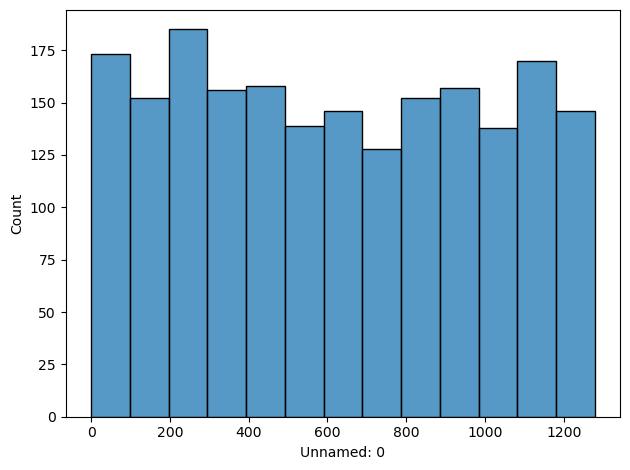

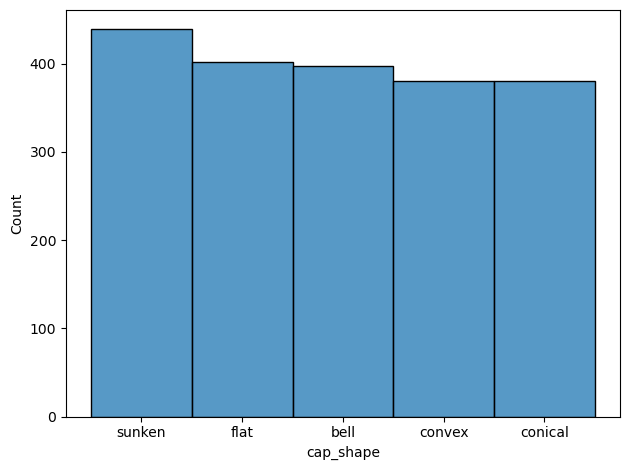

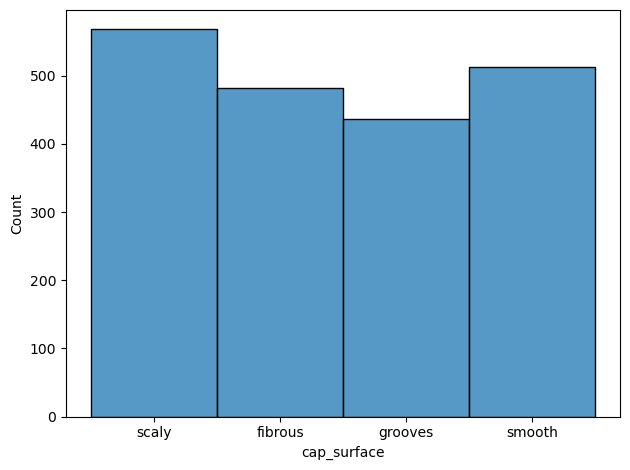

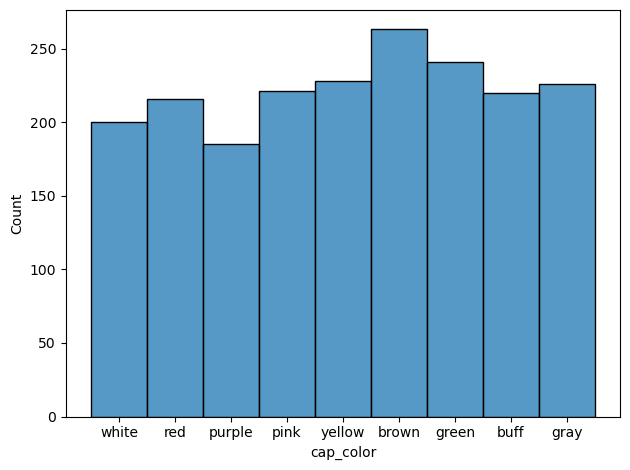

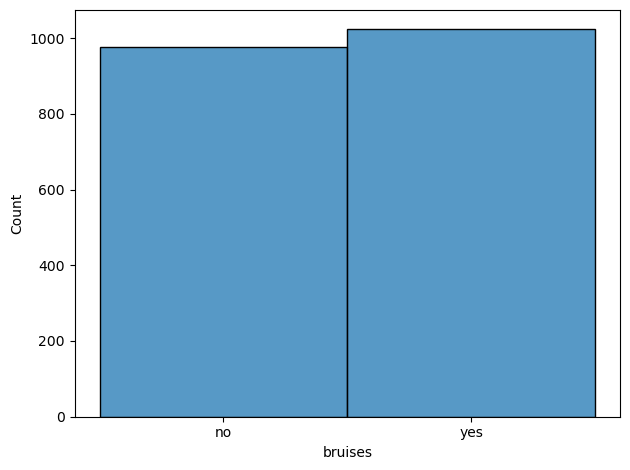

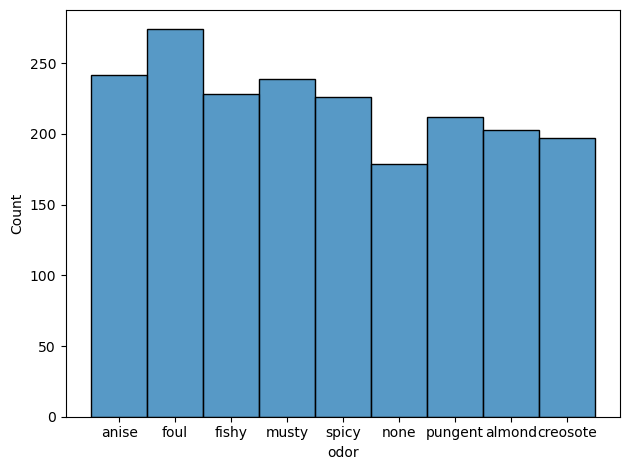

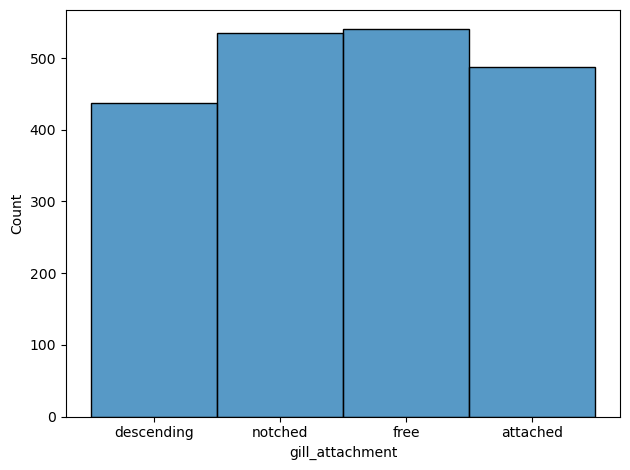

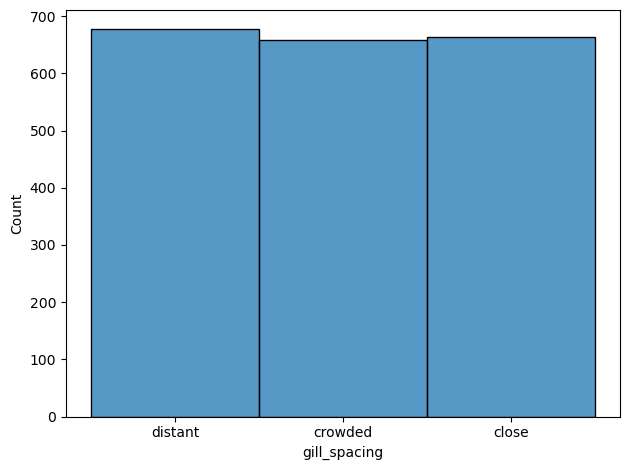

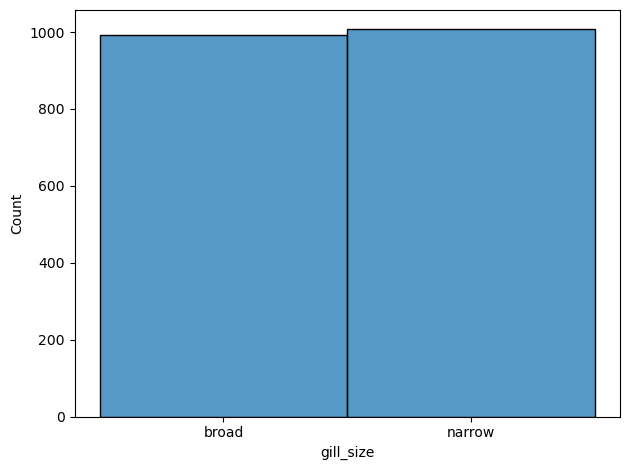

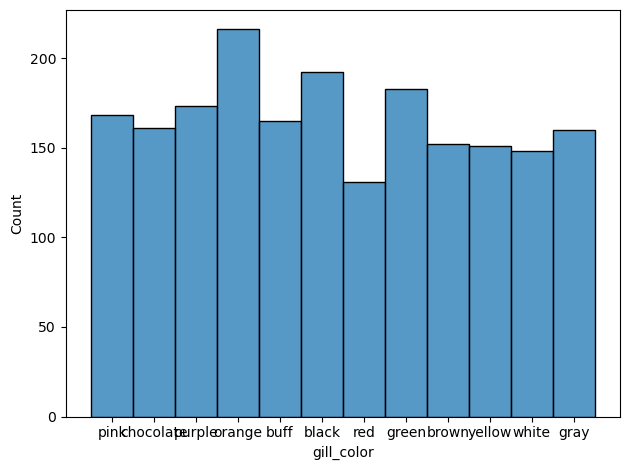

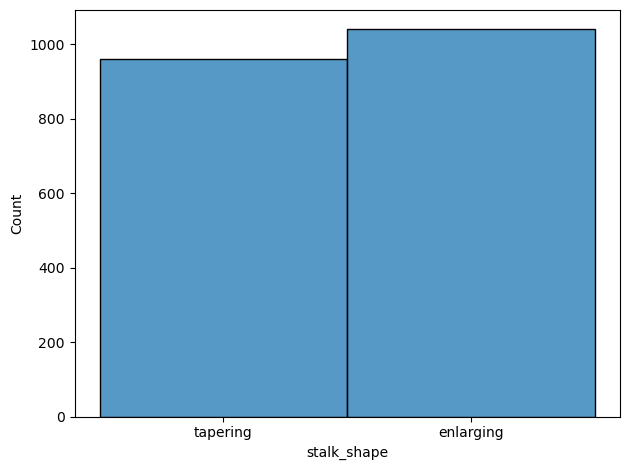

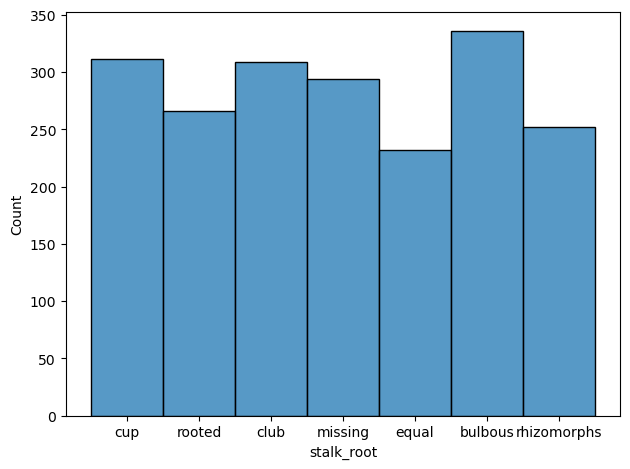

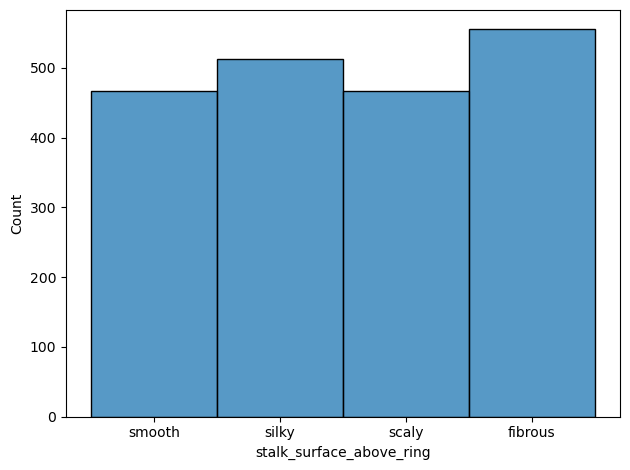

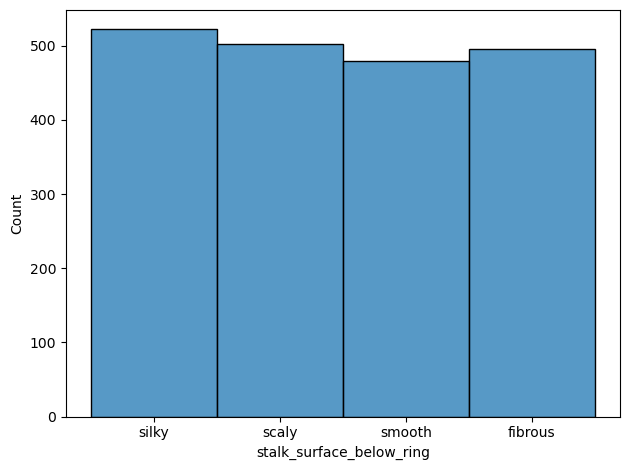

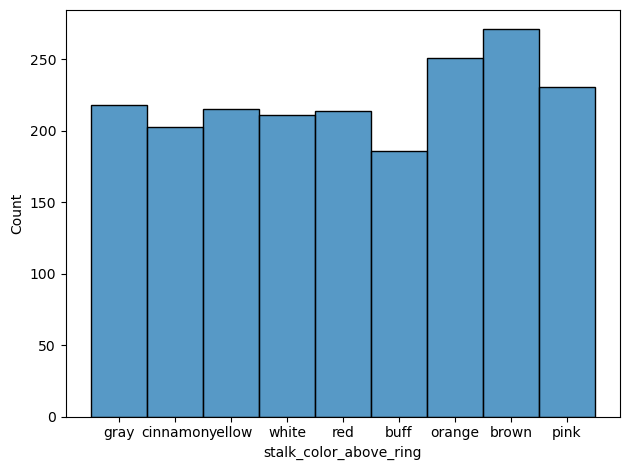

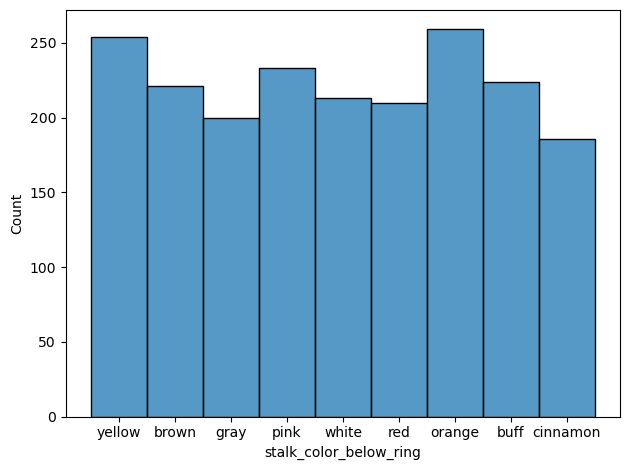

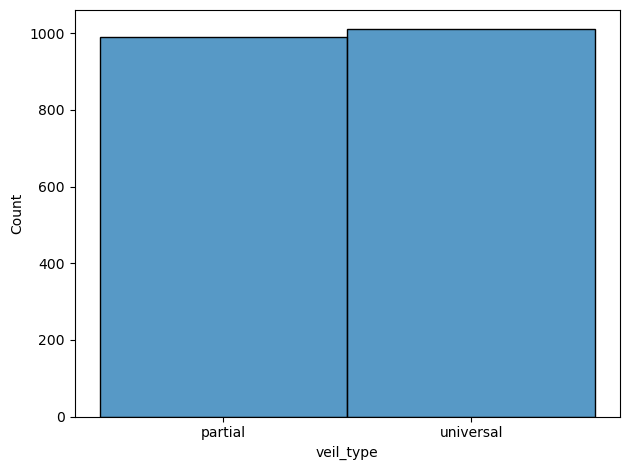

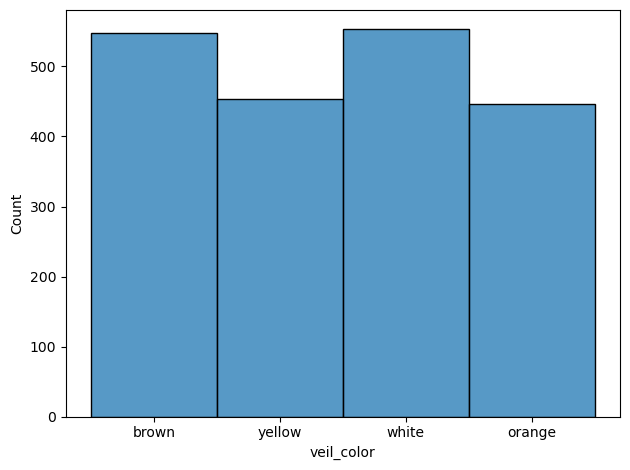

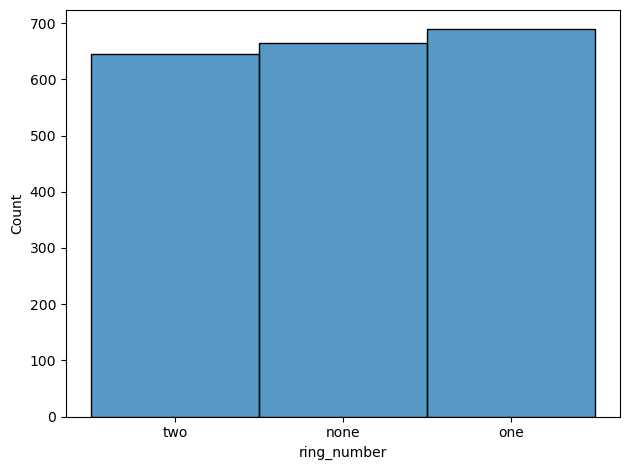

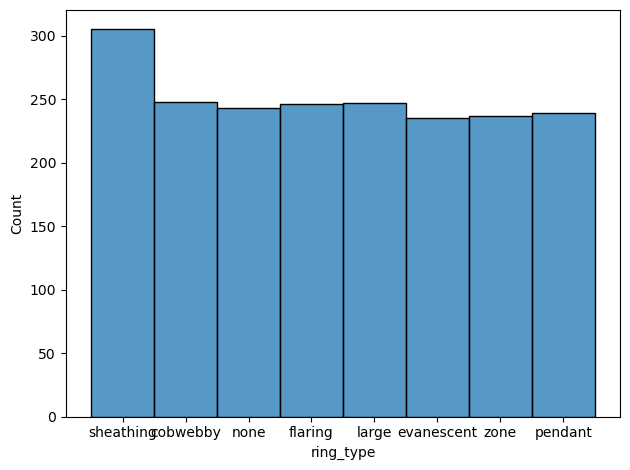

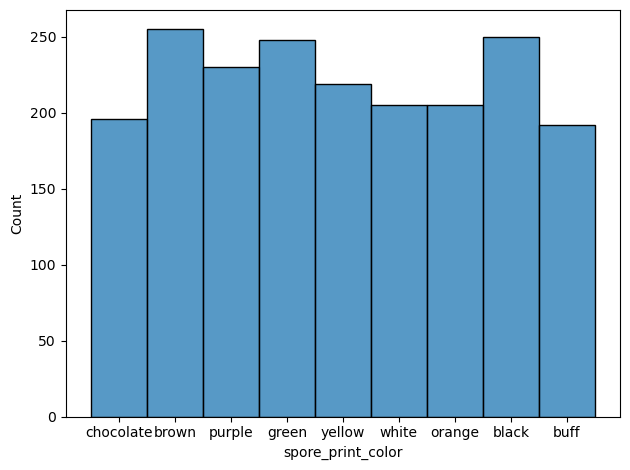

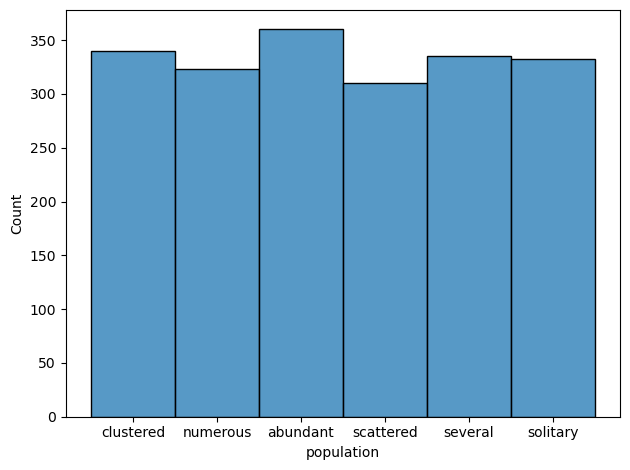

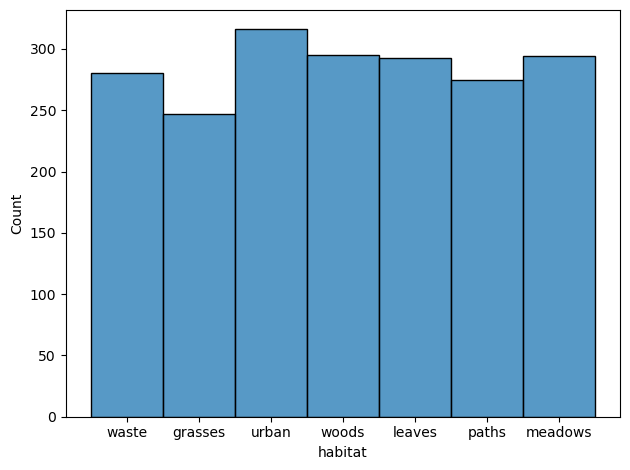

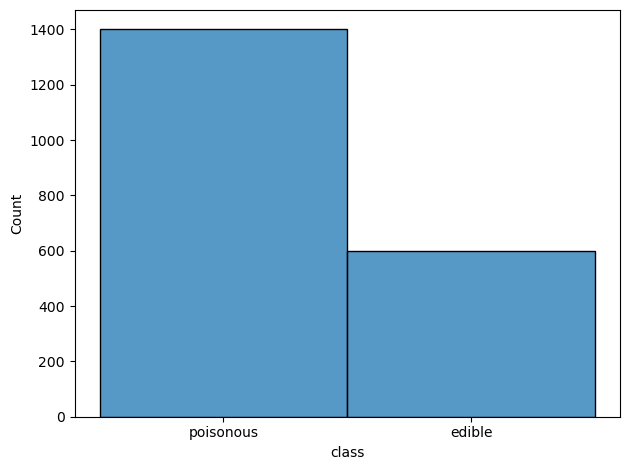

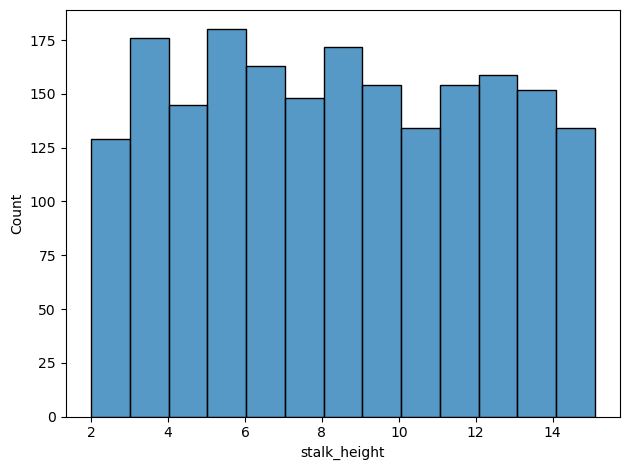

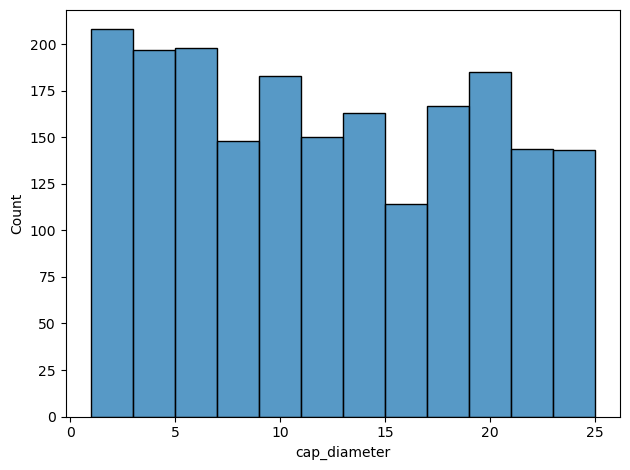

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    sns.histplot(data=df, x=col)    
    plt.tight_layout()
    plt.show()

In [12]:
# 3. Investigate feature correlations to discern relationships within the data.

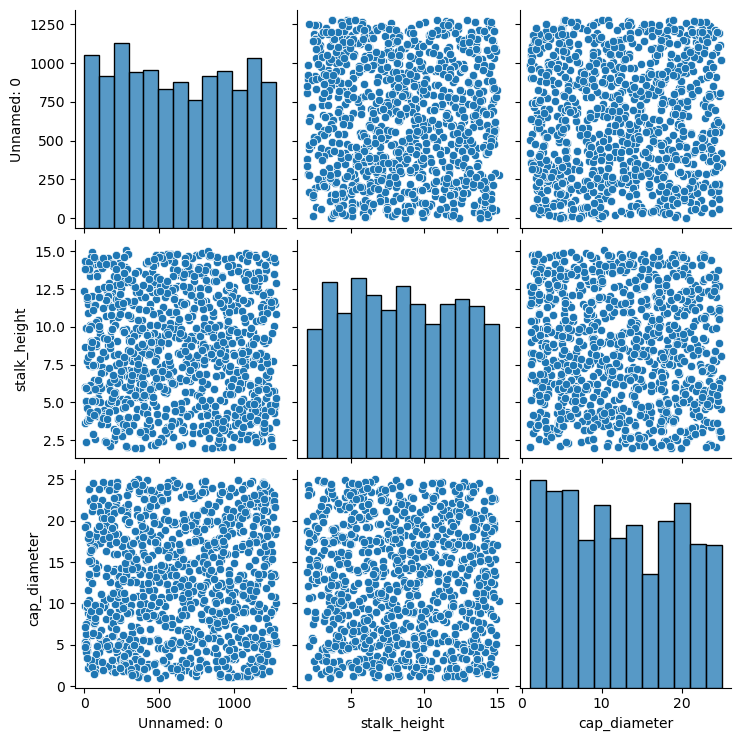

In [13]:
sns.pairplot(data=df)
plt.show()

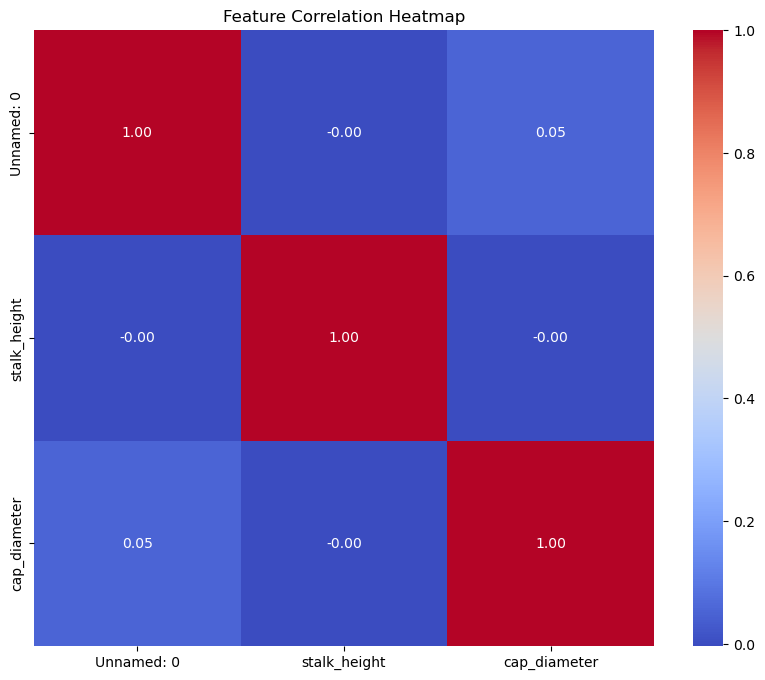

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
# Task 2: Data Preprocessing

In [16]:
# 1. Encode categorical variables if necessary.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [19]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


In [20]:
# 2. Split the dataset into training and testing sets.

In [21]:
x = df.drop('class', axis='columns')
y = df['class']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Task 3: Data Visualization

In [24]:
# 1. Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

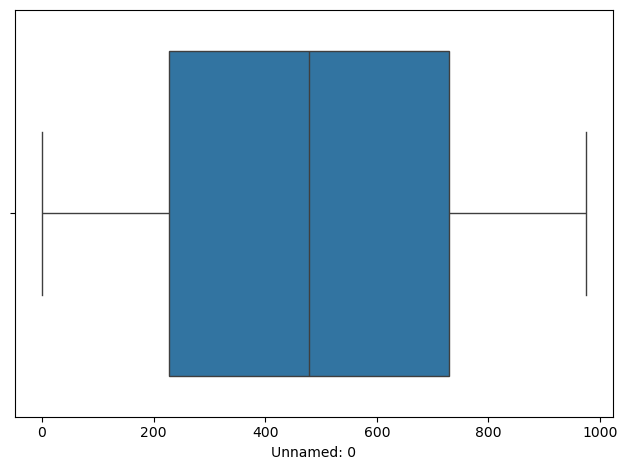

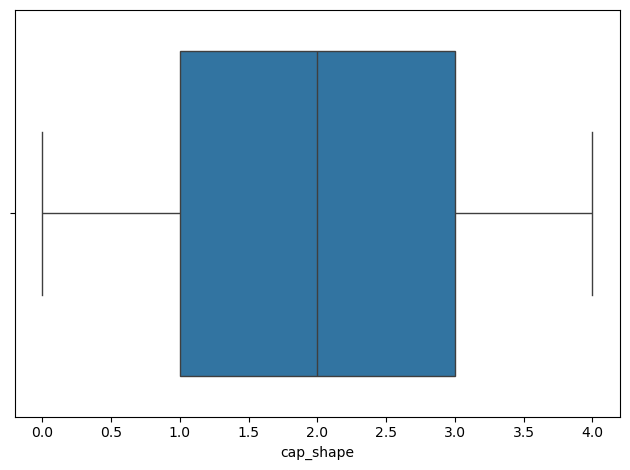

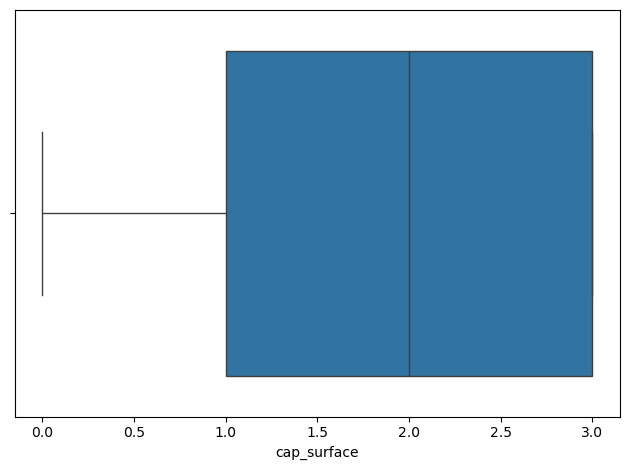

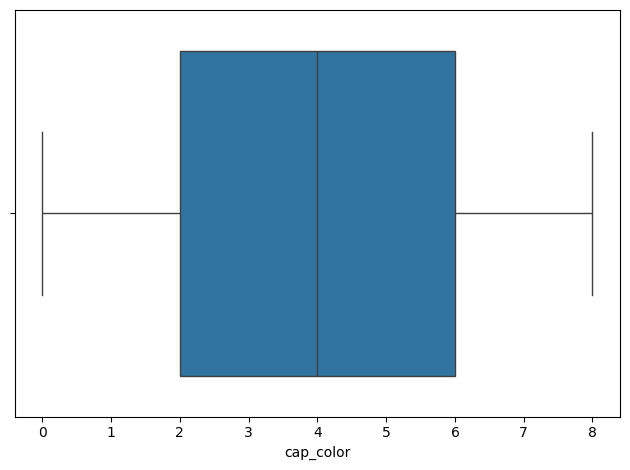

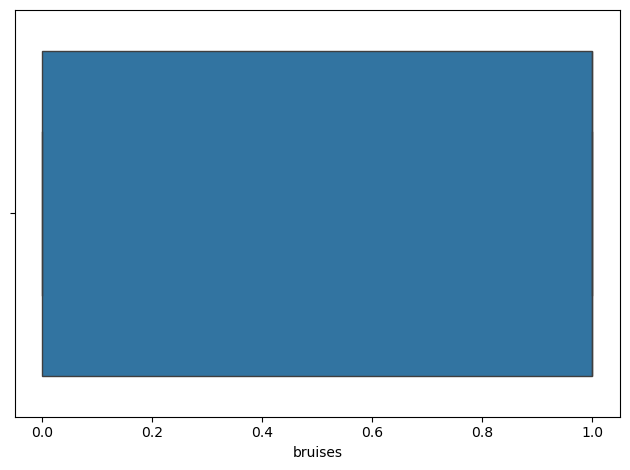

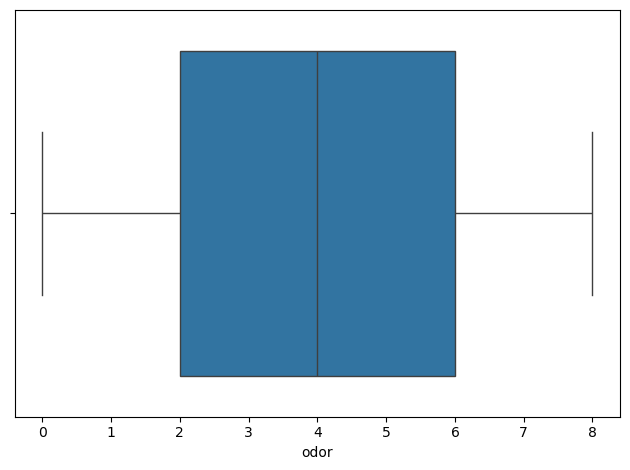

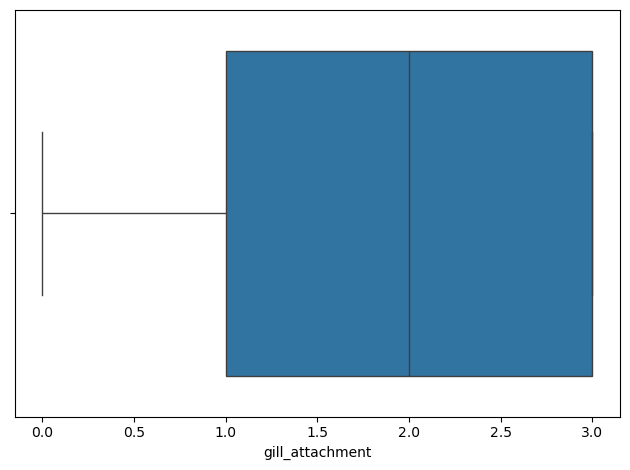

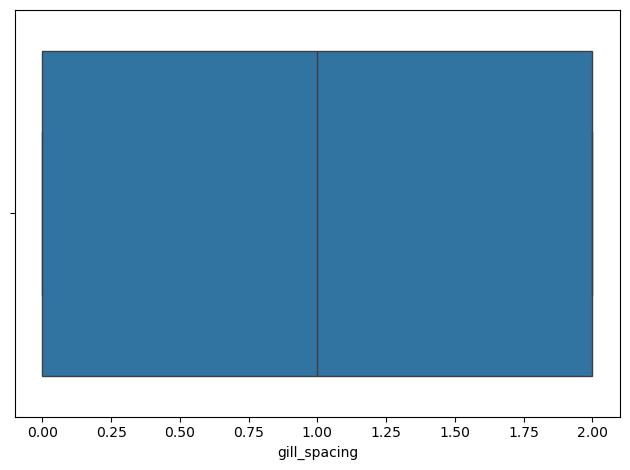

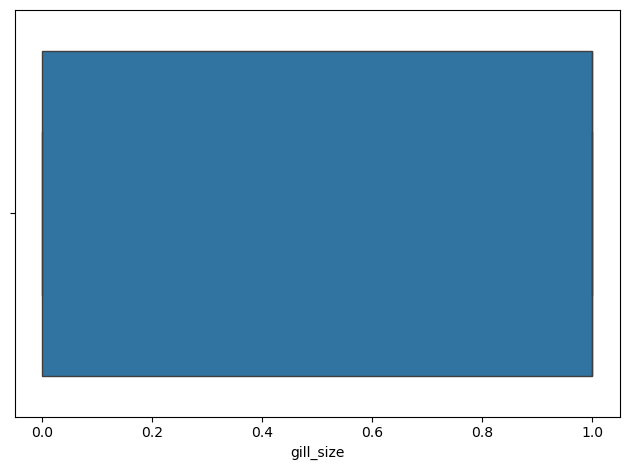

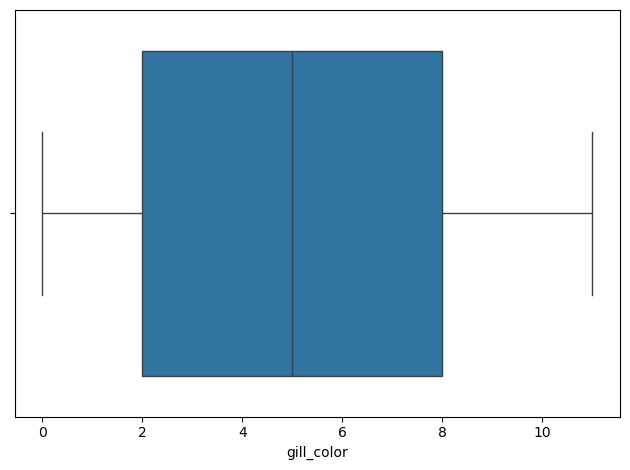

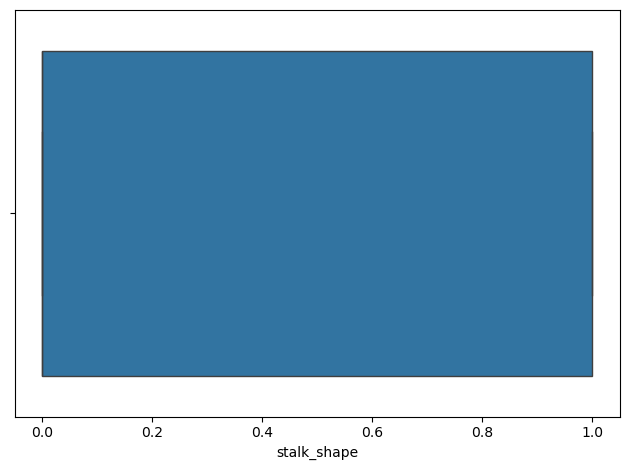

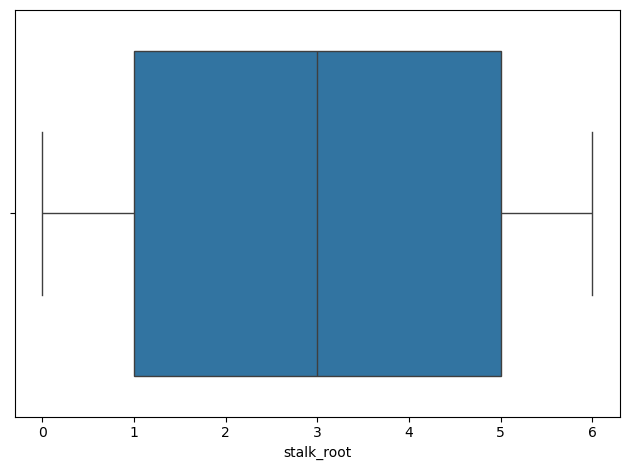

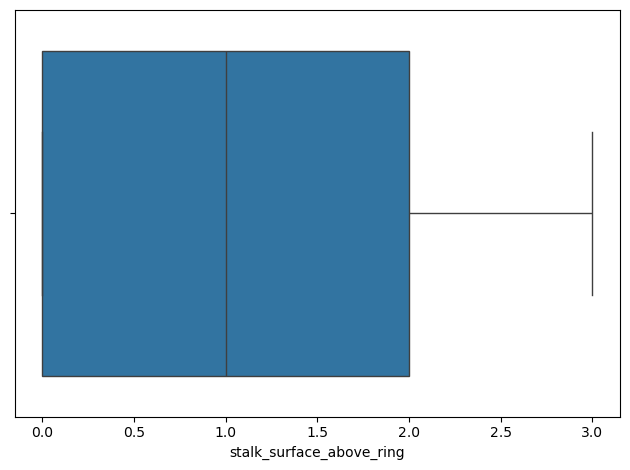

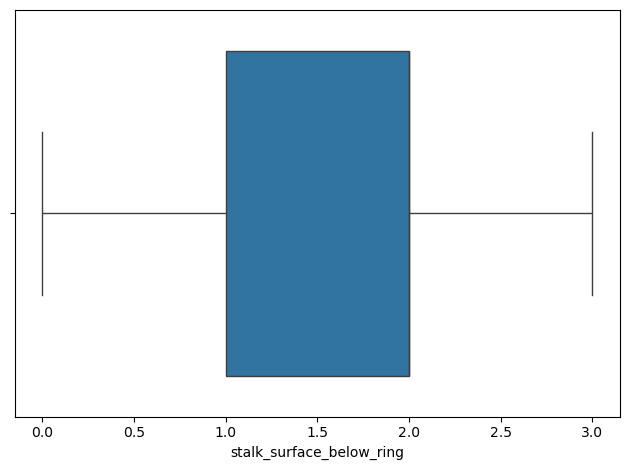

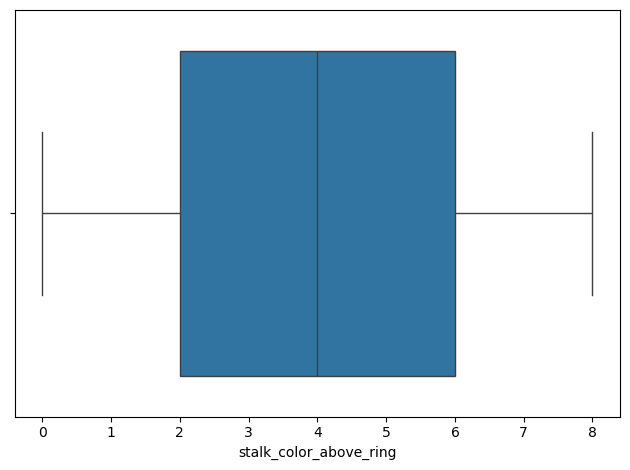

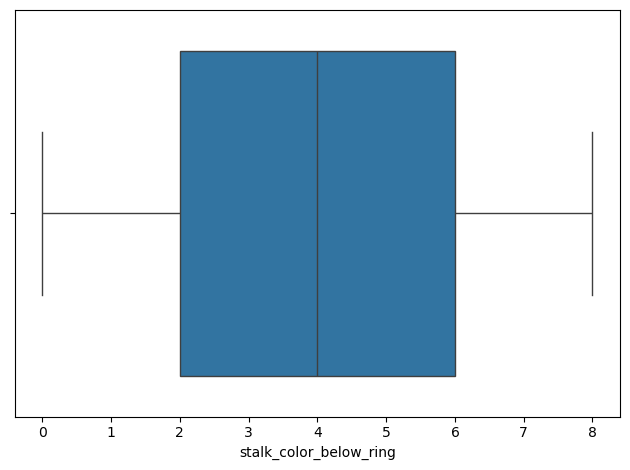

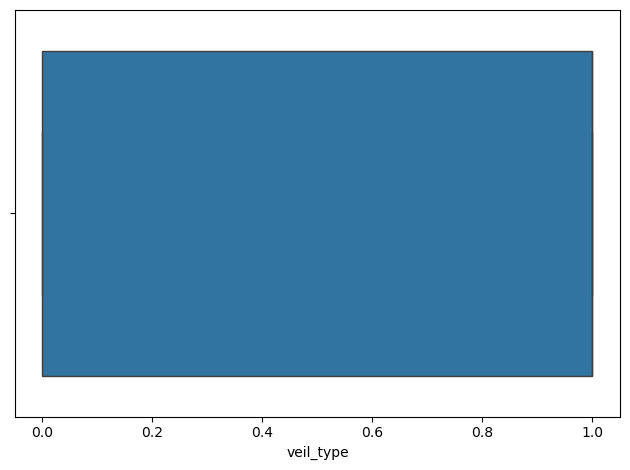

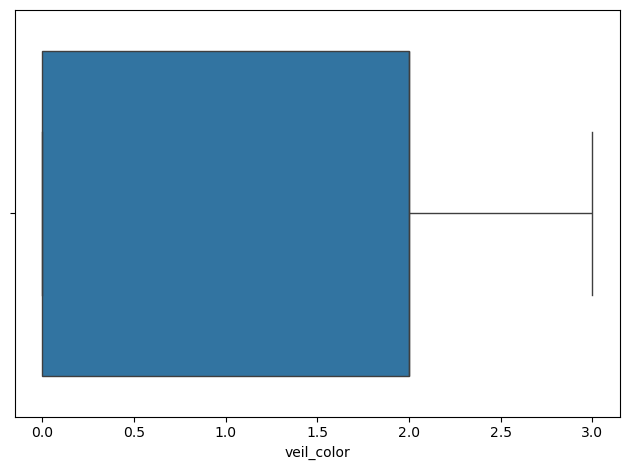

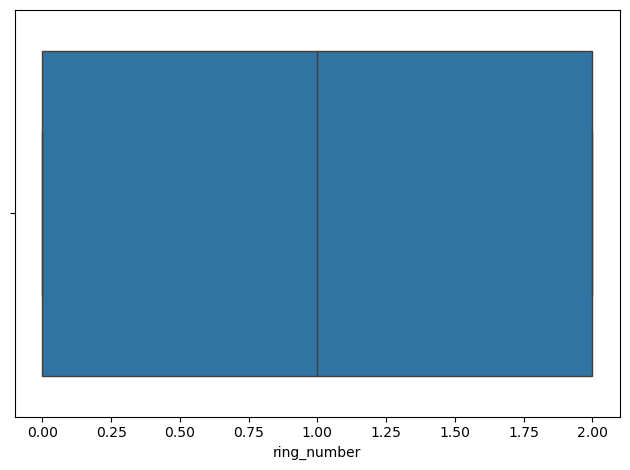

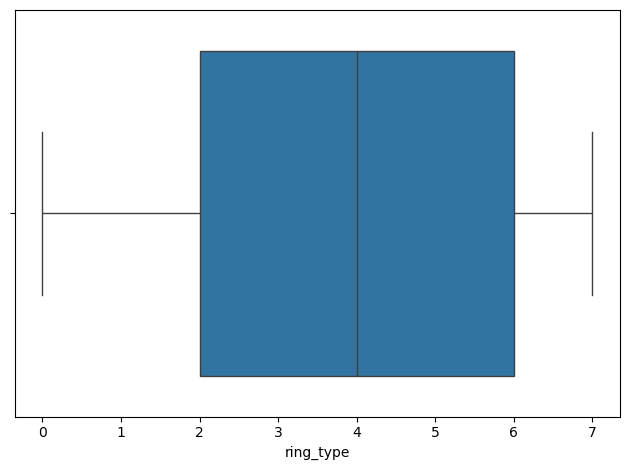

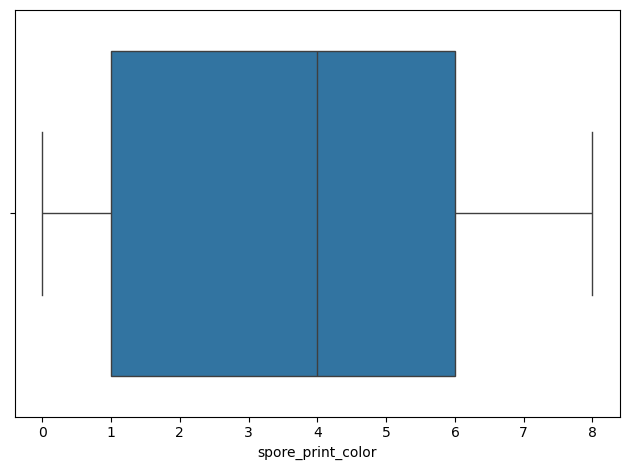

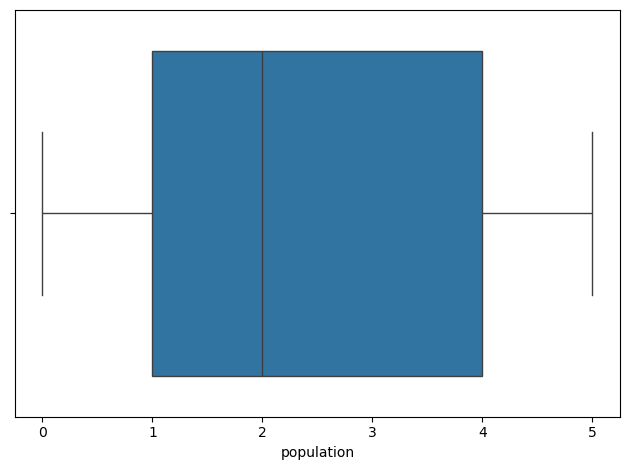

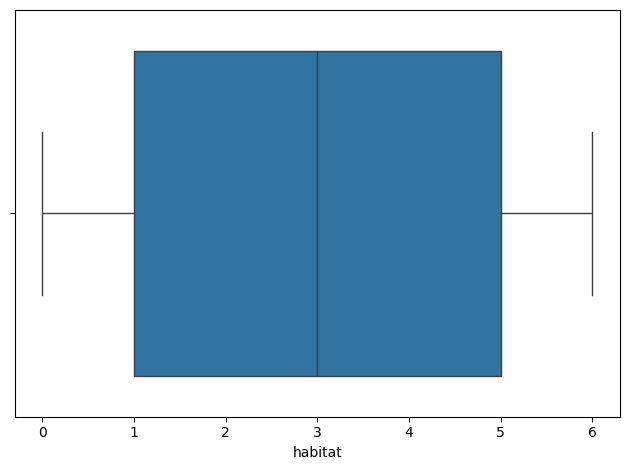

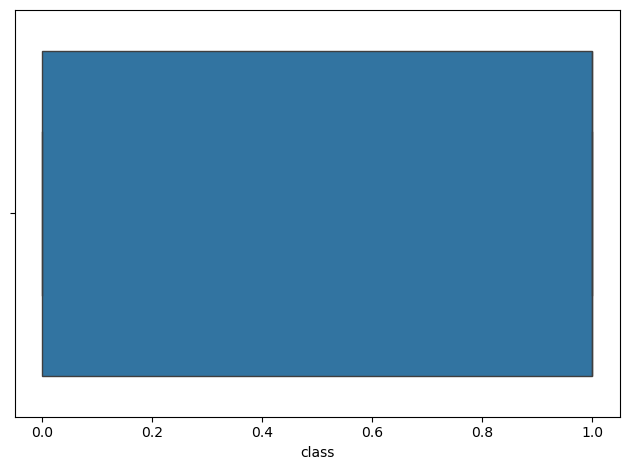

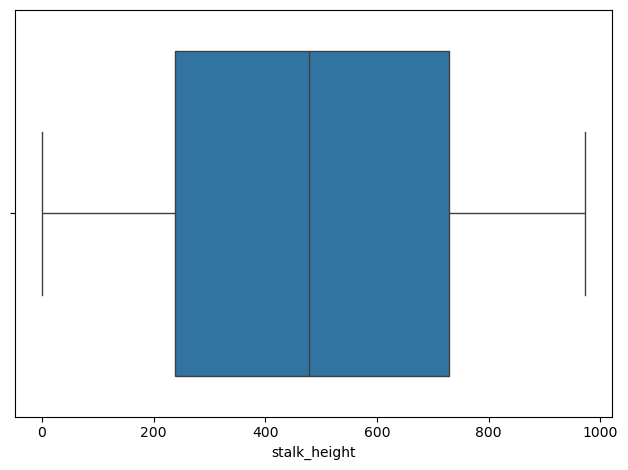

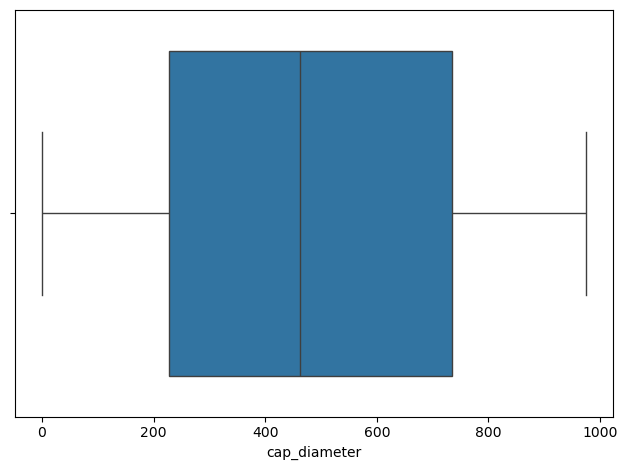

In [25]:
for col in df.columns:
    sns.boxplot(data=df, x=col)
    plt.tight_layout()
    plt.show()

In [26]:
# 2. Visualize class distributions to gauge dataset balance or imbalance.

In [27]:
print(df['class'].value_counts())

class
1    1400
0     600
Name: count, dtype: int64


C:\Users\Kishan Senjaliya\AppData\Local\Temp\ipykernel_972\1305624486.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='Set2')


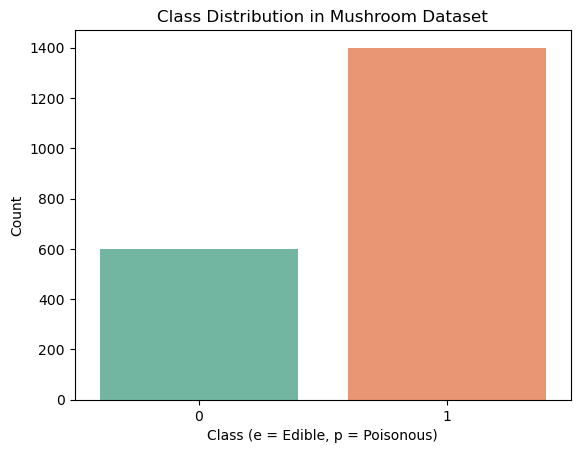

In [28]:
sns.countplot(data=df, x='class', palette='Set2')
plt.title("Class Distribution in Mushroom Dataset")
plt.xlabel("Class (e = Edible, p = Poisonous)")
plt.ylabel("Count")
plt.show()

In [29]:
# Task 4: SVM Implementation

In [30]:
# 1. Implement a basic SVM classifier using Python libraries like scikit-learn.

In [31]:
from sklearn.svm import SVC

In [32]:
# 2. Train the SVM model on the training data.

In [33]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [34]:
y_pred = model.predict(x_test)

In [35]:
# 3. Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("acc:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("reacall:", recall_score(y_test,y_pred))
print("F1-score:", f1_score(y_test,y_pred))

acc: 0.6675
Precision: 0.6675
reacall: 1.0
F1-score: 0.800599700149925


In [37]:
# Task 5: Visualization of SVM Results

In [38]:
# 1. Visualize classification results on the testing data.

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

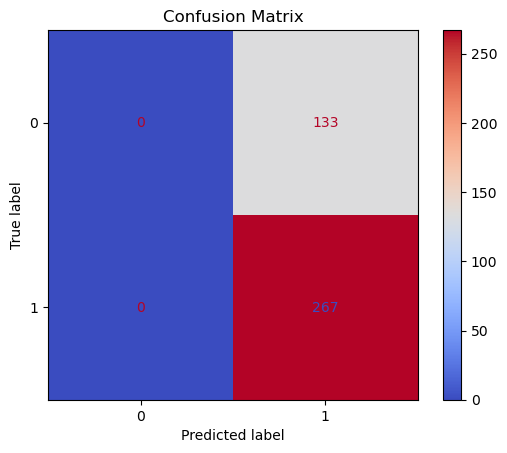

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
# Task 6: Parameter Tuning and Optimization

In [43]:
# 1. Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [44]:
param_grid = {
    'C': [0.1, 1],                   # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.001]  # Kernel coefficient
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid = GridSearchCV(SVC(), param_grid={'C': [1],
                                       'kernel': ['linear', 'rbf'],
                                       'gamma': ['scale', 0.01]}, cv=2, # Fewer folds for speed
                                        scoring='accuracy',
                                        verbose=0 # Turn off detailed output
                                       )

grid.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1], 'gamma': ['scale', 0.01],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [50]:
print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_

# Predict
y_pred = best_model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.885
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



In [ ]:
# Task 7: Comparison and Analysis

In [51]:
# 1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [52]:
# Interpretation

# | Kernel                          | Description                            | Pros                                   | Cons                         |
# | ------------------------------- | -------------------------------------- | -------------------------------------- | ---------------------------- |
# | **Linear**                      | Straight-line decision boundary        | Fast, best for linearly separable data | Poor on non-linear data      |
# | **Polynomial (poly)**           | Curved boundary with polynomial degree | Handles more complex patterns          | Prone to overfitting, slower |
# | **RBF (radial basis function)** | Gaussian-based flexible boundary       | Great for non-linear data              | Needs tuning (`gamma`)       |

In [53]:
# 2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

In [55]:
# SVM Strengths for Mushroom Dataset

# | Strength                                     | Explanation                                                                                                                      |
# | -------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------- |
# | **Effective in high-dimensional space**      | Mushroom data becomes high-dimensional after encoding categorical variables. 
                                                   # SVM performs well in such spaces.                   |
# | **Handles non-linear data**                  | With kernel tricks (like RBF), SVM can handle complex decision boundaries — useful 
                                                   # when class separation isn’t linear.           |
# | **Good generalization**                      | With proper tuning (`C`, `gamma`), SVM avoids overfitting and gives good accuracy, 
                                                   # especially with clean datasets like Mushroom. |
# | **Works well with small to medium datasets** | The mushroom dataset (\~8,000 instances) is manageable for SVM training.                                                         |

In [56]:
# # SVM Weaknesses for Mushroom Dataset

# | Weakness                                        | Explanation                                                                                                            |
# | ----------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
# | **Computationally expensive**                   | SVMs are slow with large datasets and especially costly with non-linear kernels like RBF.                              |
# | **Poor performance with unscaled/unclean data** | Since SVM is sensitive to feature scales, poor preprocessing can hurt performance.                                     |
# | **Categorical data not directly supported**     | Mushroom features are all categorical — they need to be encoded first (which increases 
                                                      # dimensionality).                |
# | **Harder to interpret**                         | Compared to decision trees or random forests, the decision boundary from SVM (especially 
                                                      # with kernels) is 
                                                      # a black box. |
# | **Requires hyperparameter tuning**              | Needs tuning of `C`, `kernel`, and `gamma`, which can be time-consuming and prone to 
                                                      # overfitting.                      |

In [57]:
# 3. Discuss practical implications of SVM in real-world classification tasks.

In [58]:
# 1. High Accuracy in Complex Domains

# SVM is widely used in domains where precision is critical:

# Medical diagnosis: e.g., classifying tumors as benign or malignant.
# Text categorization: e.g., spam detection, sentiment analysis.
# Image classification: e.g., handwriting or facial recognition.

In [59]:
# 2. Effective in High-Dimensional Data

# SVM performs well in scenarios where the number of features is greater than the number of observations:

# e.g., DNA microarray analysis, where each sample may have thousands of gene expression values.

In [60]:
# Versatile with Kernel Trick

# The kernel function enables SVM to handle non-linear data by mapping it to a higher-dimensional space:

# Useful in scenarios where relationships between features are complex and non-linear (e.g., pattern recognition, fraud detection).

# Common kernels: RBF, polynomial, sigmoid.

In [61]:
# 4. Robust to Overfitting (Especially in High-Dimensional Space)

# SVM uses regularization (C parameter) to avoid overfitting. It's effective when:

# You have clean, well-separated data.

# The number of features is large, but not too noisy.

In [62]:
# | Limitation                   | Real-World Impact                                 |
# | ---------------------------- | ------------------------------------------------- |
# | **Slow with large datasets** | Not suitable for real-time or very large datasets |
# | **Sensitive to noise**       | Outliers can affect the margin significantly      |
# | **Parameter tuning needed**  | Requires effort to choose best C, gamma, kernel   |